# Text Similarity
This Notebook focuses on calculating the similarity between 2 texts. We will be using a CSV file comprising of 2 independent features, viz. `text1` & `text2`.
Since there's no dependent variable, we have 2 options : Either treat the problem statement as an unsupervised problem and make clusters, or perform some feature engineering and treat the probem as a regression problem in supervised learning.
We would go with the supervised learning approach.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

## Approach
- We would first vectorize our texts using `TfidfVectorizer()`.
- Then, we would find the `cosine_similarity`.
- We would then  try out different machine learning models and predict the similarity score.
- Below is an example of how we would vectorize the texts.

In [2]:
# Vectorizing the texts

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)

text1 = "india is my country"
text2 = "hello there"
text = vectorizer.fit_transform([text1, text2])
text.shape

(2, 6)

In [3]:
print(text[0])

  (0, 0)	0.5
  (0, 4)	0.5
  (0, 3)	0.5
  (0, 2)	0.5


## Finding Similarity
- The cell below depicts how similarity is calculated for 2 texts by using our function `calc_similarity`.
- `calc_similarity` takes 2 strings, vectorizes them and returns the cosine similarity.

In [4]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def calc_similarity(text1, text2):
    # Preprocess the texts
    
    # Remove special characters and punctuation
    text1 = re.sub(r'[^\w\s]', '', text1)
    text2 = re.sub(r'[^\w\s]', '', text2)
    # Convert to lowercase
    text1 = text1.lower()
    text2 = text2.lower()
    
    # Vectorize the texts using TF-IDF
    vectorizer = TfidfVectorizer(min_df=1)
    text_vectors = vectorizer.fit_transform([text1, text2])

    # Calculate the cosine similarity
    cosine_sim = cosine_similarity(text_vectors[0], text_vectors[1])[0][0]

    # Convert cosine similarity to a similarity score in the range of 0 to 1
    similarity_score = cosine_sim

    return similarity_score

# Testing calc_similarity
text1 = "This is india"
text2 = "This is pakistan"
similarity = calc_similarity(text1, text2)
print("Similarity score:", similarity)


Similarity score: 0.5031026124151314


In [5]:
# Reading the CSV file into 'df'

df = pd.read_csv("Precily_Text_Similarity.csv")
df.head()

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


In [6]:
df.shape

(3000, 2)

In [7]:
cols = df.columns
cols

Index(['text1', 'text2'], dtype='object')

In [8]:
type(cols[0])

str

In [9]:
# Checking if we have any missing values in our dataset

features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_na

[]

## Feature Engineering
- We would add an extra feature `similarity score` to the dataset which would contain the similarity scores
- `similarity score` Would be our `dependent feature`

In [10]:
# Finding the similarity scores for all rows and storing them in the newly formed column
for idx in range(3000):
    str1 = df['text1'][idx]
    str2 = df['text2'][idx]
    df.loc[idx, 'similarity score'] = calc_similarity(str1, str2)
    
df['similarity score'].head(20)

0     0.554358
1     0.311934
2     0.411193
3     0.533577
4     0.423601
5     0.324470
6     0.454944
7     0.519522
8     0.420931
9     0.347751
10    0.498338
11    0.515272
12    0.553448
13    0.512737
14    0.344467
15    0.541494
16    0.536287
17    0.597753
18    0.589176
19    0.419888
Name: similarity score, dtype: float64

## Training our models
- We will be training `XGBoost`, `LinearRegression`, `SVM's SVR`.
- We will also try building a `Neural Network`.
- We will then evaluate the performances of these models using performance metrics like `r2_score`, `mean_squared_error`, `mean_absolute_error`.
- The model with best performance will be used for predicting the similarity score.

In [11]:
# Splitting out dataset into train data and test data

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df[['text1', 'text2']], df['similarity score'], test_size=0.2, random_state=42)

In [12]:
# Performing fit_transform on combined text of text1 and text2 using the vectorizer object
xtrain = vectorizer.fit_transform(xtrain['text1'] + ' ' + xtrain['text2'])

In [13]:
# Vectorizing the independent feature of our test data
xtest = vectorizer.transform(xtest['text1']+' '+xtest['text2'])

## XGBoost

In [14]:
# Importing xgboost
import xgboost as xgb

# Training and predicting our model
xgbmodel = xgb.XGBRegressor()
xgbmodel.fit(xtrain, ytrain)
xgb_pred = xgbmodel.predict(xtest)

In [15]:
xgb_pred

array([0.42797002, 0.4597487 , 0.2932161 , 0.46567684, 0.42732933,
       0.5171724 , 0.49551073, 0.5426214 , 0.27734712, 0.5401858 ,
       0.48108476, 0.53148794, 0.42584357, 0.55112207, 0.45668018,
       0.48483148, 0.59645206, 0.42613575, 0.40947336, 0.5366212 ,
       0.40929744, 0.36468294, 0.50264263, 0.584264  , 0.23147014,
       0.39910924, 0.51947856, 0.4328256 , 0.50145996, 0.40542957,
       0.526122  , 0.39067486, 0.35474437, 0.33899546, 0.4469741 ,
       0.41380432, 0.48962256, 0.2988011 , 0.4496635 , 0.46789908,
       0.27967927, 0.42543286, 0.592894  , 0.40098765, 0.5422163 ,
       0.5242108 , 0.5082526 , 0.38154468, 0.38550952, 0.35421214,
       0.56087697, 0.3787509 , 0.36826554, 0.44445795, 0.3724649 ,
       0.5151    , 0.38531065, 0.543245  , 0.3745809 , 0.4660894 ,
       0.44284543, 0.389992  , 0.26847842, 0.504365  , 0.42396447,
       0.53790575, 0.3650322 , 0.41854495, 0.38301703, 0.52687573,
       0.49330544, 0.57784355, 0.4575203 , 0.41330785, 0.47178

In [16]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_xgb = mean_squared_error(ytest, xgb_pred)
mae = mean_absolute_error(ytest, xgb_pred)
r2_xgb = r2_score(ytest, xgb_pred)

print("Mean Squared Error : {}".format(mse_xgb))
print("Mean Absolute Error : {}".format(mae))
print("R Squared : {}".format(r2_xgb))

Mean Squared Error : 0.0028519796626279405
Mean Absolute Error : 0.042087699692336986
R Squared : 0.6986165936109974


## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
linear_regr_model = LinearRegression()
linear_regr_model.fit(xtrain, ytrain)
linear_pred = linear_regr_model.predict(xtest)

mse_lin = mean_squared_error(ytest, linear_pred)
mae = mean_absolute_error(ytest, linear_pred)
r2_lin = r2_score(ytest, linear_pred)

print("Mean Squared Error : {}".format(mse_lin))
print("Mean Absolute Error : {}".format(mae))
print("R Squared : {}".format(r2_lin))

Mean Squared Error : 0.004384500171963547
Mean Absolute Error : 0.05057862487341803
R Squared : 0.5366672440006355


## SVM

In [18]:
from sklearn.svm import SVR
svm_model = SVR(kernel='linear')
svm_model.fit(xtrain, ytrain)
svmpred = svm_model.predict(xtest)

mse_svm = mean_squared_error(ytest, svmpred)
mae = mean_absolute_error(ytest, svmpred)
r2_svm = r2_score(ytest, linear_pred)

print("Mean Squared Error : {}".format(mse_svm))
print("Mean Absolute Error : {}".format(mae))
print("R Squared : {}".format(r2_svm))

Mean Squared Error : 0.003902223101115766
Mean Absolute Error : 0.05000901858131005
R Squared : 0.5366672440006355


## Neural Network

In [20]:
xtrain = xtrain.toarray()
xtest = xtest.toarray()
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Our Sequential model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with R2 score as the metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


# Train the model
history = model.fit(xtrain, ytrain, epochs=25, batch_size=32)

# Model Evaluation
print("\n\n")
loss, mse_nn = model.evaluate(xtest, ytest)
print("Mean Squared Error:", mse_nn)
# y_pred = model.predict(xtest)
# r2 = r2_score(ytest, y_pred)
# print("R2 Score:", r2)


# Make predictions using the trained model
predictions = model.predict(xtest)


Epoch 1/25
75/75 [==============================] - 4s 33ms/step - loss: 0.0088 - mse: 0.0088
Epoch 2/25
75/75 [==============================] - 2s 32ms/step - loss: 0.0039 - mse: 0.0039
Epoch 3/25
75/75 [==============================] - 2s 32ms/step - loss: 0.0024 - mse: 0.0024
Epoch 4/25
75/75 [==============================] - 2s 32ms/step - loss: 0.0017 - mse: 0.0017
Epoch 5/25
75/75 [==============================] - 2s 31ms/step - loss: 0.0014 - mse: 0.0014
Epoch 6/25
75/75 [==============================] - 2s 30ms/step - loss: 0.0011 - mse: 0.0011
Epoch 7/25
75/75 [==============================] - 2s 30ms/step - loss: 9.3148e-04 - mse: 9.3148e-04
Epoch 8/25
75/75 [==============================] - 2s 31ms/step - loss: 7.4777e-04 - mse: 7.4777e-04
Epoch 9/25
75/75 [==============================] - 2s 31ms/step - loss: 6.1715e-04 - mse: 6.1715e-04
Epoch 10/25
75/75 [==============================] - 2s 31ms/step - loss: 5.0508e-04 - mse: 5.0508e-04
Epoch 11/25
75/75 [========

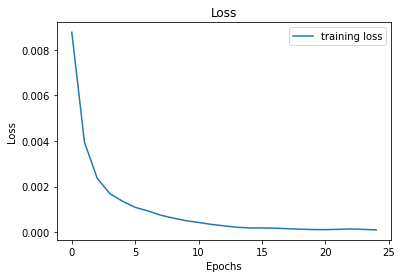

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='training loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

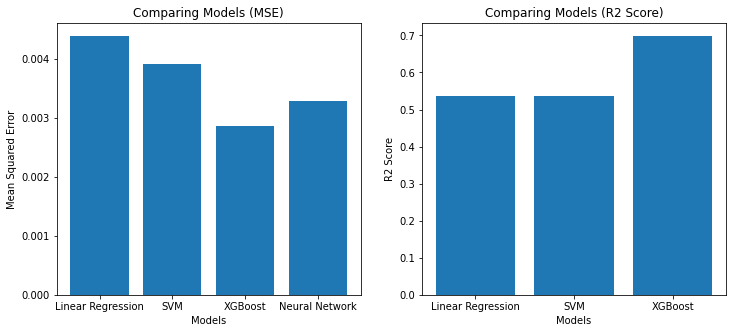

In [31]:
#
import matplotlib.gridspec as gridspec

figure = plt.figure(figsize=(12,5))
grid=gridspec.GridSpec(ncols=2,nrows=1,figure=figure)

figure.add_subplot(grid[0])
models = ["Linear Regression", "SVM", "XGBoost", "Neural Network"]
mse_values = [mse_lin, mse_svm, mse_xgb, mse_nn]
plt.bar(models, mse_values)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Comparing Models (MSE)")


figure.add_subplot(grid[1])
models = ["Linear Regression", "SVM", "XGBoost"]
mse_values = [r2_lin, r2_svm, r2_xgb]
plt.bar(models, mse_values)
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Comparing Models (R2 Score)")
plt.show()

## Inference
- On comparing the Mean Squared Errors of the models, `XGBoost` has the least error.
- On comparing the `r2_score`s of the models, `XGBoost` has the maximum r2 score.
- A model having least mean squared error but a high r2 score is considered as the ideal one.
- Thus, it can be inferred that the `XGBoost` model has performed better than the others and hence, we will be saving this model to be loaded later in our `app2.py Flask application`.

In [32]:
# Saving the trained model in the same directory for future use
xgbmodel.save_model('xgbmodel2.model')

### What Next?
- Now that we have saved our model, we can head to building our Flask app for a development environment.
- We will have an `app2.py` flask application and the `index.html` template to be rendered
- This notebook won't be needed anymore and can be referred to as a technical documentation as well, even though a short 1 pager report would be provided.